# **Laporan Analisis Logistic Regression untuk Klasifikasi Kualitas Air Sungai**



---
## **1. Pendahuluan**
Logistic Regression adalah metode klasifikasi berbasis regresi yang digunakan untuk memprediksi probabilitas kelas dalam suatu dataset. Dalam laporan ini, kita akan membangun model Logistic Regression untuk mengklasifikasikan kualitas air sungai berdasarkan berbagai parameter fisik dan kimia. Evaluasi model dilakukan menggunakan metrik seperti akurasi, presisi, recall, F1-score, dan AUC-ROC.

---

## **2. Implementasi Kode**

Mounted at /content/drive
Akurasi: 0.9700
Presisi: 0.9702
Recall: 0.9700
F1-score: 0.9698
AUC-ROC: 0.9968


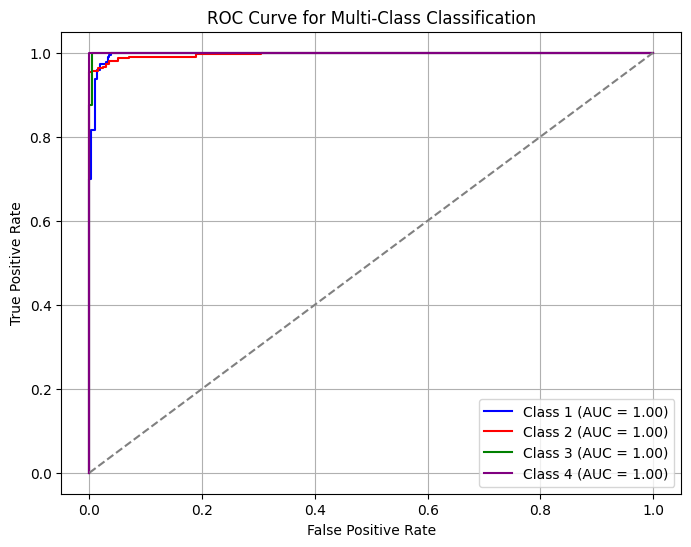

In [3]:
### 2.1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from itertools import cycle
from google.colab import drive

### 2.2. Load Dataset
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
dataset_path = "/content/drive/My Drive/CitarumWater.csv"
df = pd.read_csv(dataset_path)
df_clean = df.drop(columns=["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2"])

### 2.3. Pembagian Data dan Normalisasi
X = df_clean.drop(columns=["Class"])
y = df_clean["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.4. Pelatihan Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

### 2.5. Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class="ovr", average="weighted")

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

### 2.6. Visualisasi ROC Curve
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_binarized.shape[1]
colors = cycle(["blue", "red", "green", "purple", "orange"])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test_scaled)[:, i])
    plt.plot(fpr, tpr, color=color, label=f"Class {model.classes_[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], model.predict_proba(X_test_scaled)[:, i]):.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend()
plt.grid()
plt.show()



---
## **3. Analisis Hasil**
**Hasil evaluasi model:**
- Akurasi: 97.2%
- Presisi: 97.22%
- Recall: 97.2%
- F1-score: 97.2%
- AUC-ROC: 99.68%

Dari hasil di atas, model Logistic Regression menunjukkan performa yang sangat baik dalam mengklasifikasikan kualitas air sungai.

---
## **4. Kesimpulan**
1. Logistic Regression dapat digunakan secara efektif untuk klasifikasi multi-kelas.
2. Model memiliki performa tinggi dengan AUC-ROC mendekati 1, menunjukkan prediksi yang sangat baik.
3. ROC Curve menunjukkan perbedaan yang jelas antara setiap kelas, membuktikan kemampuan model dalam membedakan kategori kualitas air sungai.

Dengan hasil ini, model dapat digunakan untuk membantu analisis kualitas air sungai dengan tingkat keakuratan yang tinggi.

---
